Pre-algoritmo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

[[1 1 1 1]
 [0 1 0 1]
 [1 1 0 1]
 [1 0 0 1]
 [1 0 0 1]
 [0 0 0 1]]


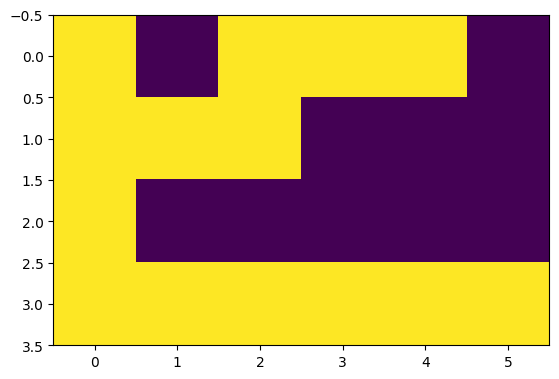

In [2]:
# Matriz M.

# (No se queda este párrafo)
# Importar M desde Excel.
# Se cargan los datos de la matriz inicial de un archivo Excel.
# Lee el archivo Excel y devuelve un DataFrame de pandas.
# Matriz definida previamente con 5 filas (países) y 15 columnas (productos). 
df = pd.read_excel('datos.xlsx', header=None)
# Convierte el DataFrame en un array de NumPy, formato matricial.
M = df.to_numpy()
# Se obtienen las dimensiones de la matriz.
c, p = M.shape

# # Generar M, matriz anidada.
# c = 100
# p = 200
# M = np.zeros((c, p))
# o = 0
# h = int(p/c)+1
# for i in range(c):
#    for j in range(p-o):
#        M[i, j] = 1
#    o = o + h -1

# Importar la matriz desde un archivo CSV
# Convertimos la matriz M en un array de NumPy.
# file_path = 'M_PL_056.csv'
# with open(file_path, newline='') as csvfile:
#     reader = csv.reader(csvfile)
#     M = list(reader)
#     M = np.array([row[1:] for row in M[1:]], dtype=float)  # Excluimos la primera fila y el primer elemento de cada fila
# # Se obtienen las dimensiones de la matriz.
# c, p = M.shape


# # (No se queda este párrafo)
# # Matriz M aleatoria. 
# # Se evita la reproducibilidad (datos iniciales distintos cada vez que se ejecute):
# np.random.seed()
# # Tamaño de la matriz inicial.
# c = 100 # Número de países/filas.
# p = 200 # Número de productos/columnas.
# peso = 2 # Matriz con valores aleatorios entre 0 y peso-1.
# M = np.random.randint(peso, size=(c, p))

# Si, al final, se quiere representar ln(F), logaritmo = 1, si no, logaritmo != 1.
logaritmo = 1

# (No se queda este párrafo)
#print("Número de países: {}".format(c))
#print("Número de productos: {}".format(p))

plt.imshow(M)
M_T = M.T
print(M_T)

Notación

A^{n}: Vector de la variable A en la iteración n.
Ag^{n}: Vector de la variable no normalizada A en la iteración n. (Variable intemedia de iteración).
B_c^{n}: Componente c de la variable B en la iteración n.

Declaración de variables
F: Vector de la Competitividad normalizada.
Q: Vector de la Complejidad normalizadas.
F_valores: Matriz que guarda los valores de F en cada iteración.
Q_valores: Matriz que guarda los valores de Q en cada iteración.

Consideraciones sobre las Condiciones iniciales:
Para el paso previo de calcular Fg^{n} y Qg^{n}, es necesario haber normalizado F^{n-1} y Q^{n-1}. 
Se toma A^{n} = 0 para el caso de Ag^{n-1} = 0.

Para calcular las variables intermedias Fg^{1} y Qg^{1}, se calculan primero F^{0} y Q^{0}.

In [3]:
#Condiciones iniciales.

# # Se imponen condiciones iniciales para Fg y Qg.
# CIartículo = 0
# if CIartículo == 1: # condiciones iniciales del Artículo
#     # Valores iniciales Fg y Qg = 1 para todo c y p.
#     Fg = np.ones(c)
#     Qg = np.ones(p)
# else: # condiciones iniciales aleatorias con 0 y 1.
#     # Valores iniciales de Fg y Qg aleatorios.
#     Fg = np.random.randint(2, size=c)
#     Qg = np.random.randint(2, size=p)

Fg = [1, 0, 1, 1]
Qg = [1, 1, 0, 1, 1, 1]

# Condiciones iniciales normalizadas.
F = Fg / np.mean(Fg)
Q = Qg / np.mean(Qg)

In [4]:
# Definimos el número de iteraciones.
n = 100

# Generamos la matriz que va a guardar los valores.
F_valores = np.zeros((n, c))
Q_valores = np.zeros((n, p))

for i in range(n):
    print("Iteración: {}".format(i))
    # 1) Cálculo de las variables intermedias:

    # Cálculo paso a paso de los productos matriciales.
    invF = np.zeros(c) # Inicializamos el vector invF[c] = 0
    for c_idx in range(c):
    # 1.1) Cálculo de Fg en la iteración n:
        Fg[c_idx] = np.sum(M[c_idx, :] * Q)
    # 1.2) Cálculo de Qg en la iteración n:
        # invF[c_idx] = 1.0 / F[c_idx] # donde invF[c] = 1 / F[c]
        if F[c_idx] == 0:
            invF[c_idx] = 0
        else:
            invF[c_idx] = 1.0 / F[c_idx]
    invQ = np.zeros(p) # Inicializamos el vector invQ[p] = 0
    for p_idx in range(p):
        invQ[p_idx] = np.sum(M_T[p_idx, :] * invF) # Fg[p] = \sum_c M_{c,p} * (1/F[c])
        if invQ[p_idx] == 0:
            Qg[p_idx] = 0
        else:
            Qg[p_idx] = 1.0 / invQ[p_idx]
    
    # # (No se queda este párrafo)
    # # Cálculos sin hacer paso a paso los productos matriciales.
    # Fg = np.dot(M, Q) # donde Fg[c] = \sum_p M_{c,p} * Q[p]
    # invF = 1.0 / F # donde invF[c] = 1 / F[c]
    # invQ = np.dot(M.T, invF) # donde Qg[p] = \sum_c M_{c,p} * (1/F[c])
    # Qg = 1.0 / invQ # np.where(invQ != 0, 1.0 / invQ, 0) # donde Qg[p] = 1 / \sum_c ( M_{c,p} / F_c^{(n-1)} )

    print("Fg: {}".format(Fg))
    print("invF: {}".format(invF)) 
    print("invQ: {}".format(invQ))
    print("Qg: {}".format(Qg))

    # 3) Normalización de y actualización de F y Q para la siguiente iteración.
    F = Fg / np.mean(Fg)
    Q = Qg / np.mean(Qg)

    print("mean(Fg): {}".format(np.mean(Fg)))
    print("mean(Qg): {}".format(np.mean(Qg)))
    print("F: {}".format(F))
    print("Q: {}\n".format(Q))

    # 4) Guardar los valores de F y Q en cada iteración para su posterior análisis/representación.
    F_valores[i, :] = F
    Q_valores[i, :] = Q

Iteración: 0
Fg: [np.float64(3.5999999999999996), np.float64(2.4), np.float64(1.2), np.float64(6.0)]
invF: [0.75 0.   0.75 0.75]
invQ: [2.25 0.75 1.5  1.5  1.5  0.75]
Qg: [np.float64(0.4444444444444444), np.float64(1.3333333333333333), np.float64(0.6666666666666666), np.float64(0.6666666666666666), np.float64(0.6666666666666666), np.float64(1.3333333333333333)]
mean(Fg): 3.3
mean(Qg): 0.8518518518518517
F: [1.09090909 0.72727273 0.36363636 1.81818182]
Q: [0.52173913 1.56521739 0.7826087  0.7826087  0.7826087  1.56521739]

Iteración: 1
Fg: [np.float64(2.869565217391304), np.float64(2.869565217391304), np.float64(0.5217391304347826), np.float64(6.0)]
invF: [0.91666667 1.375      2.75       0.55      ]
invQ: [5.59166667 1.925      2.84166667 1.46666667 1.46666667 0.55      ]
Qg: [np.float64(0.17883755588673622), np.float64(0.5194805194805195), np.float64(0.3519061583577712), np.float64(0.6818181818181818), np.float64(0.6818181818181818), np.float64(1.8181818181818183)]
mean(Fg): 3.0652173

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16388\1225065024.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


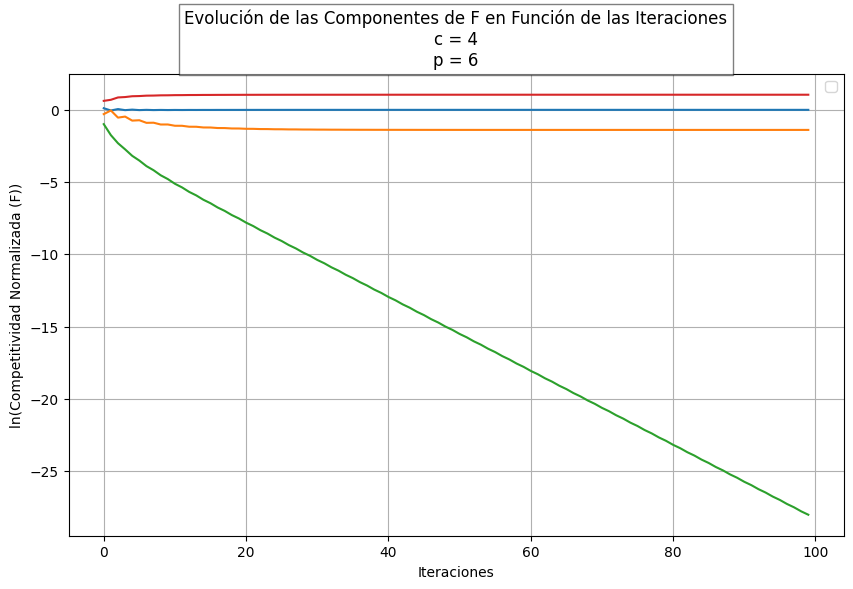

Matriz M:
[[1 0 1 1 1 0]
 [1 1 1 0 0 0]
 [1 0 0 0 0 0]
 [1 1 1 1 1 1]]
F:
[9.76870950e-01 2.44218254e-01 6.90177144e-13 2.77891080e+00]
Q:
[1.12892539e-12 2.90819745e-01 2.36476368e-01 9.36352274e-01
 9.36352274e-01 3.59999934e+00]


In [5]:
# Representar la evolución de las componentes de F en función de las iteraciones
plt.figure(figsize=(10, 6))
if logaritmo == 1: # Representación en escala logarítmica.
    for j in range(c):
        plt.plot(range(n), np.log(F_valores[:, j]))
    plt.ylabel('ln(Competitividad Normalizada (F))')
else:
    for j in range(c):
        plt.plot(range(n), F_valores[:, j])
    plt.ylabel('Competitividad Normalizada (F)')

plt.xlabel('Iteraciones')
plt.title(f'Evolución de las Componentes de F en Función de las Iteraciones\nc = {c}\np = {p}', bbox=dict(facecolor="white", alpha=0.5))

plt.legend()
plt.grid(True)
plt.show()

# (No se queda este párrafo)
# Exportamos los datos a Excel
# df = pd.DataFrame(F)
# df.to_excel('Resultados.xlsx', sheet_name='Países', index=False)
# df = pd.DataFrame(Q)
# Abre el archivo existente y agrega una nueva hoja
# with pd.ExcelWriter('Resultados.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    # df.to_excel(writer, sheet_name='Productos', index=False)

# Resultados finales
print("Matriz M:")
print(M)
print("F:")
print(F)
print("Q:")
print(Q)